In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

import pandas as pd

import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [ ]:
!wget https://github.com/Miguelillnino/HPCSE-2022-Aprendizaje-Automatico/raw/main/archive.zip -O Boston.zip

--2023-08-20 04:05:10--  https://github.com/Miguelillnino/HPCSE-2022-Aprendizaje-Automatico/raw/main/archive.zip
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Miguelillnino/HPCSE-2022-Aprendizaje-Automatico/main/archive.zip [following]
--2023-08-20 04:05:10--  https://raw.githubusercontent.com/Miguelillnino/HPCSE-2022-Aprendizaje-Automatico/main/archive.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13074 (13K) [application/zip]
Saving to: ‘Boston.zip’

Boston.zip          100%[===================>]  12.77K  --.-KB/s    in 0s      

2023-08-20 04:05:11 (69.8 MB/s) - ‘Boston.zip’ saved [13

In [ ]:
!unzip /content/Boston.zip

Archive:  /content/Boston.zip
  inflating: Boston.csv              




## Conjunto de datos "The Boston"

## El conjunto de datos "The Boston Housing" es un derivado de información recolectada por el censo de servicio de los Estados Unidos en el área de Boston MA. Acontinuación se desciben los significados de las columnas:

   **CRIM - tasa de criminalidad per cápita por ciudad**

   **ZN - proporción de suelo residencial zonificado para lotes de más de 25.000 pies cuadrados**

   **INDUS - proporción de acres de negocios no minoristas por ciudad.**

   **CHAS - Variable ficticia de Charles River (1 si el tramo limita con el río; 0 en caso contrario)**

   **NOX - concentración de óxidos nítricos (partes por 10 millones)**

   **RM - número promedio de habitaciones por vivienda**

   **AGE - proporción de unidades ocupadas por sus propietarios construidas antes de 1940**

   **DIS - distancias ponderadas a cinco centros de empleo de Boston**

   **RAD - índice de accesibilidad a carreteras radiales**

   **TAX - tasa de impuesto a la propiedad de valor total por $10,000**

   **PTRATIO - proporción de alumnos-maestro por localidad**

   **B - 1000(Bk - 0,63)^2 donde Bk es la proporción de gente en los suburbios por ciudad**

   **LSTAT - % estado inferior de la población**

   **MEDV - valor medio de viviendas ocupadas por sus propietarios en miles de dólares**



In [ ]:
df = pd.read_csv("/content/Boston.csv")
df.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
df1 = df.drop(columns=['Unnamed: 0','medv'])#,'chas','black','dis','rm','zn' Better #,'chas','black'

In [ ]:
df2 = df.drop(columns=['Unnamed: 0','crim','zn','indus','chas','nox','rm','age','dis','rad','tax','ptratio','black','lstat'])

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   medv    506 non-null    float64
dtypes: float64(1)
memory usage: 4.1 KB


<Axes: >

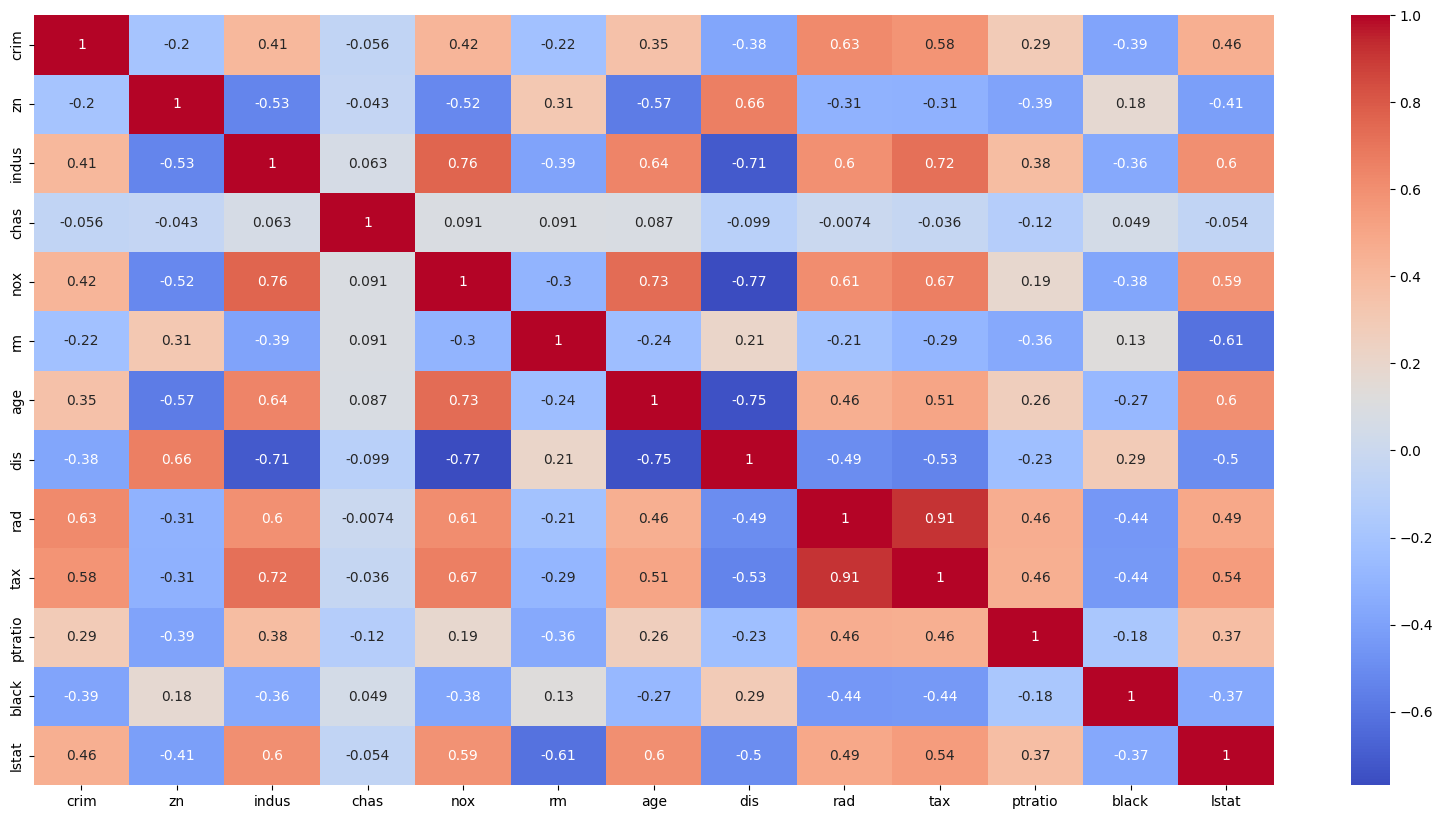

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df1.corr(), annot=True, cmap='coolwarm')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df1, df2, test_size=0.2)

In [ ]:
X_train = preprocessing.scale(X_train)

X_test = preprocessing.scale(X_test)

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


4/4 [==============================] - 0s 4ms/step
The R2 score on the Train set is:	0.964
The R2 score on the Test set is:	0.826


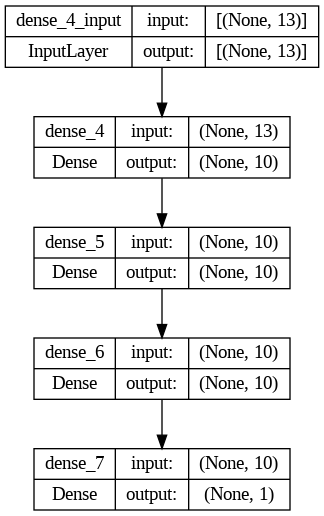

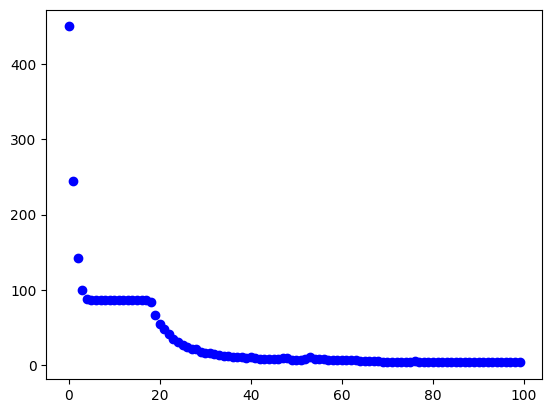

In [ ]:
# Defines "deep" model and its structure
model = Sequential()
model.add(Dense(10, input_shape=(len(df1.columns),), activation='sigmoid'))
#model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(1,))
#model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])
model.compile(Adam(lr=0.05), 'mean_squared_error') #0.03

# Pass several parameters to 'EarlyStopping' function and assigns it to 'earlystopper'
#earlystopper = EarlyStopping(monitor='val_loss', min_delta=0, patience=15, verbose=1, mode='auto')

# Fits model over 2000 iterations with 'earlystopper' callback, and assigns it to history
history = model.fit(X_train, y_train, epochs = 100, validation_split = 0.0,shuffle = True, verbose = 0)
#, callbacks = [earlystopper]

# Plots 'history'
history_dict=history.history
loss_values = history_dict['loss']
#val_loss_values=history_dict['val_loss']
plt.plot(loss_values,'bo',label='training loss')
#plt.plot(val_loss_values,'r',label='training loss val')

# Runs model with its current weights on the training and testing data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculates and prints r2 score of training and testing data
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_test_pred)))

tf.keras.utils.plot_model(model, 'model.png', show_shapes=True) #pip install pydot

In [ ]:
# Runs model with its current weights on the training and testing data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculates and prints r2 score of training and testing data
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_test_pred)))

4/4 [==============================] - 0s 3ms/step
The R2 score on the Train set is:	0.964
The R2 score on the Test set is:	0.826


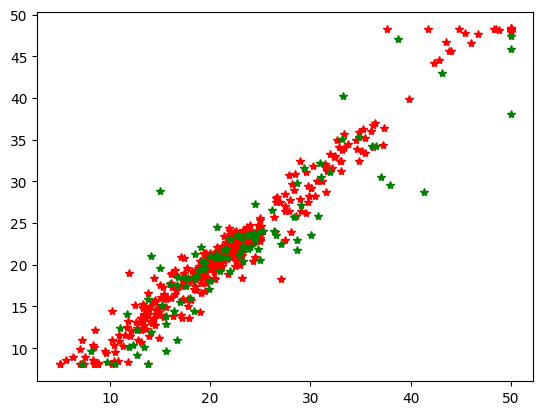

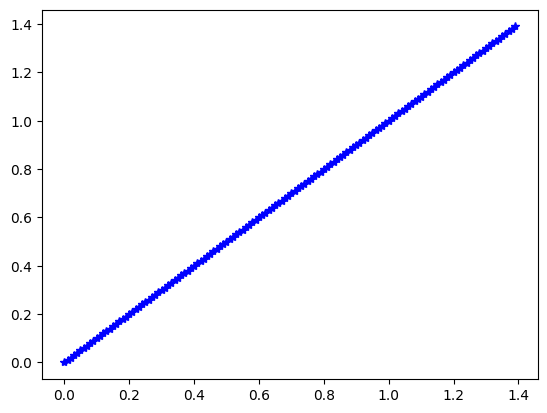

In [ ]:
plt.plot(y_train, y_train_pred,'*r')
plt.plot(y_test, y_test_pred, '*g')
plt.figure()
for i in range(0,140):
    plt.plot(i/100,i/100,'*b')

In [ ]:
y_test_pred
#y_test

array([[12.6008625],
       [18.505188 ],
       [31.612322 ],
       [20.012463 ],
       [24.626877 ],
       [24.088755 ],
       [19.779282 ],
       [13.369704 ],
       [12.788121 ],
       [22.685532 ],
       [34.47941  ],
       [42.29786  ],
       [19.387562 ],
       [23.517076 ],
       [30.863571 ],
       [21.248621 ],
       [19.984165 ],
       [20.767036 ],
       [29.2999   ],
       [20.129347 ],
       [ 9.330366 ],
       [20.163528 ],
       [20.522453 ],
       [42.82396  ],
       [20.203545 ],
       [13.779834 ],
       [43.575966 ],
       [43.53617  ],
       [21.699224 ],
       [21.717506 ],
       [19.253334 ],
       [24.208895 ],
       [43.5215   ],
       [10.392353 ],
       [20.34961  ],
       [21.856428 ],
       [23.00994  ],
       [ 9.317878 ],
       [36.946495 ],
       [37.383163 ],
       [18.47985  ],
       [21.377666 ],
       [21.998291 ],
       [24.62513  ],
       [23.991686 ],
       [21.0496   ],
       [17.306612 ],
       [10.26

In [ ]:
pred_df = pd.DataFrame(data=y_test_pred, columns=["y_pred"])
test_df = pd.DataFrame(data=y_test, columns=["medv"])

In [ ]:
Final_df=pred_df.join(test_df["medv"])
Final_df

,y_pred,medv
0,34.942055,24.0
1,25.553629,NaN
2,21.634005,34.7
3,22.957064,NaN
4,17.616690,NaN
...,...,...
97,46.090672,NaN
98,13.327999,NaN
99,34.101158,NaN
100,20.118732,NaN
